In [1]:
import utils
import torch
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import mplhep as hep
import numpy as np
import pandas as pd
import awkward as ak
from numba import njit
import vector
import numba as nb
import numpy.ma as ma
from torch.utils.data import DataLoader

vector.register_numba()
vector.register_awkward()


hep.style.use(hep.style.ROOT)
torch.set_default_dtype(torch.double)

from Dataset_Parton_Level import Dataset_PartonLevel
from Dataset_Reco_Level import Dataset_RecoLevel
from utils import Test

2023-03-27 10:33:12.216797: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
data_for_dataloader_Parton = Dataset_PartonLevel("../../../dataset_1/v7/")
batch_size = 10000

data_loaded_Parton = DataLoader(data_for_dataloader_Parton, batch_size=batch_size, shuffle=False, drop_last=True)
 
(mask_partons, data_partons, 
 mask_lepton_partons, data_lepton_partons, 
 mask_boost, data_boost, 
 mask_incomining_particles_boost, data_incomining_particles_boost,
 data_intermediate, data_intermediate_cartesian,
 data_ps) = next(iter(data_loaded_Parton))

Create new file for partons
Create new file for lepton_partons
Create new file for boost
Create new file for incoming_particles_boost
Create new file for H_thad_tlep
(569993, 3, 4)
Create new file for H_thad_tlep_cartesian
(569993, 3, 4)


In [9]:
test = utils.Test()

print(data_intermediate.shape)
px_reco, py_reco = test.check_px_py((data_intermediate,))
pz_reco = test.check_pz((data_intermediate,))

print(py_reco)
print(px_reco)
print(pz_reco)


torch.Size([10000, 3, 4])
tensor([ 0.0051, -0.0002, -0.0013,  ..., -0.0034, -0.0079, -0.0033])
tensor([ 0.0056, -0.0001,  0.0132,  ...,  0.0020, -0.0115, -0.0054])
tensor([-0.0138, -0.0010, -0.0173,  ..., -0.0026, -0.0154,  0.0227])


In [10]:
# Mass from data_incomining_particles_boost
mass_incoming = torch.sqrt(data_incomining_particles_boost[:,0,0]**2 - data_incomining_particles_boost[:,0,1]**2 - data_incomining_particles_boost[:,0,2]**2- data_incomining_particles_boost[:,0,3]**2)

In [11]:
data_final = torch.sum(data_intermediate_cartesian, axis=1)
print(data_final[0:2])

# Mass from data_intermediate_cartesian
final_mass_cartesian = data_final[:,0]**2 - data_final[:,1]**2 - data_final[:,2]**2 - data_final[:,3]**2
final_mass_cartesian = torch.sqrt(final_mass_cartesian)

tensor([[ 5.3526e+02,  5.6142e-03,  5.0778e-03, -1.3837e-02],
        [ 8.5331e+02, -1.2374e-04, -2.3100e-04, -1.0290e-03]])


In [12]:
higgs = data_for_dataloader_Parton.get_Higgs_notFromDecay()
thad = data_for_dataloader_Parton.get_top_hadronic()
tlep = data_for_dataloader_Parton.get_top_leptonic()

# Mass from hisst/thad/tlep
final_state = higgs + thad + tlep
final_state_mass = ak.to_numpy(final_state.tau)

# Mass from first 2 gluons
initial_state = data_for_dataloader_Parton.get_incoming_particles()
initial_state_mass = ak.to_numpy(initial_state.mass)


In [19]:
print(mass_incoming - initial_state_mass[:batch_size])
print(final_mass_cartesian - final_state_mass[:batch_size])

tensor([0., 0., 0.,  ..., 0., 0., 0.])
tensor([0., 0., 0.,  ..., 0., 0., 0.])


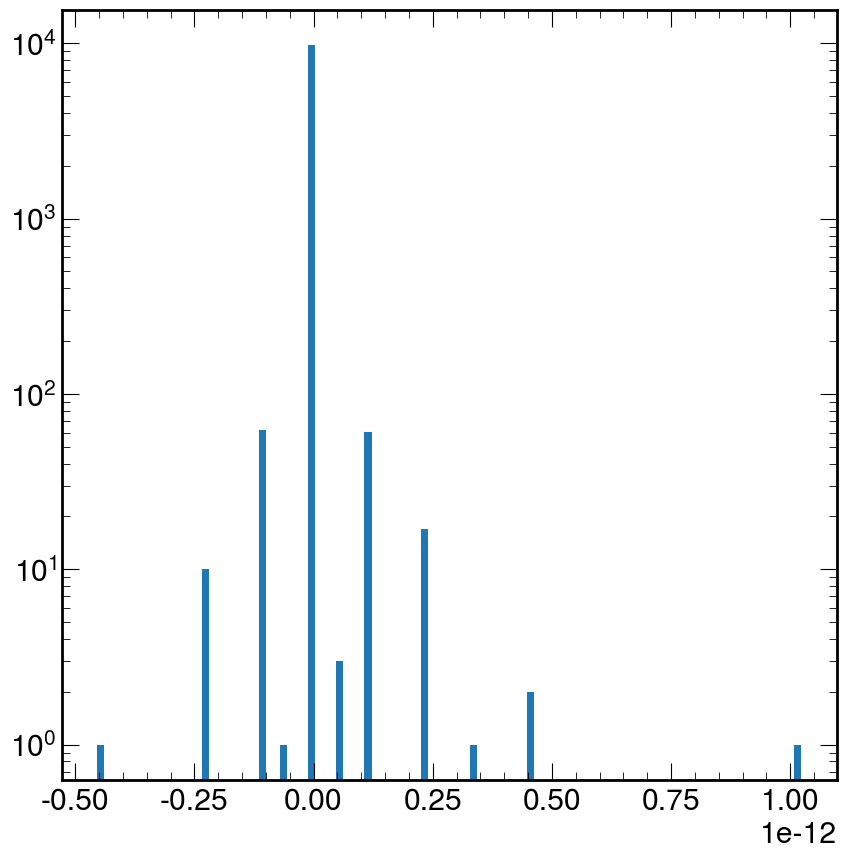

In [20]:
plt.hist(mass_incoming - initial_state_mass[:batch_size], bins=100)
plt.yscale("log")

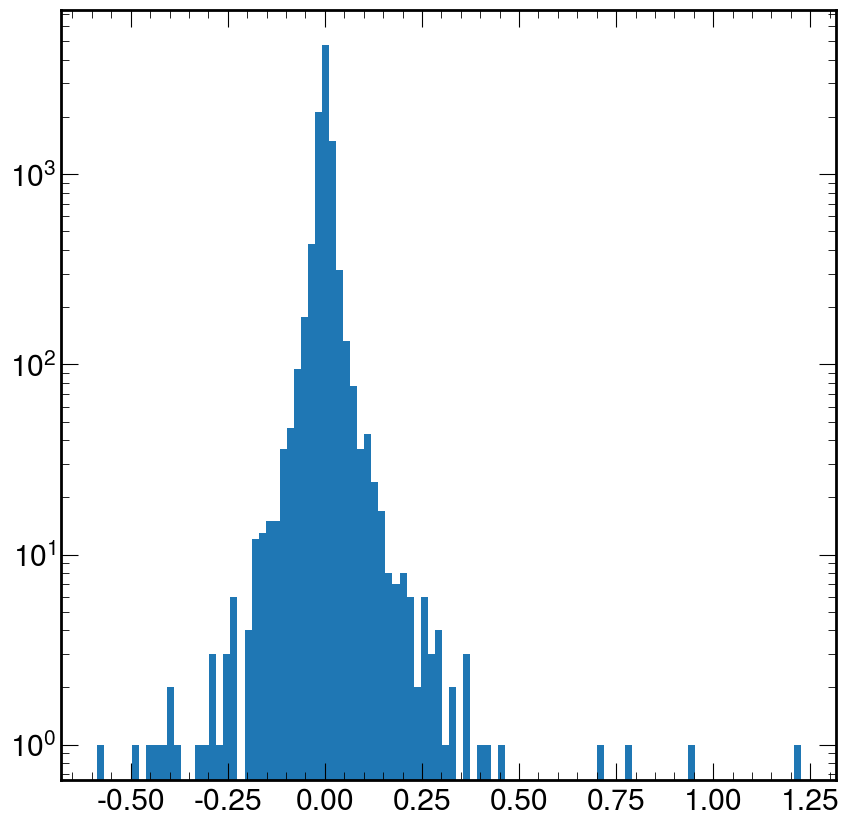

In [21]:
plt.hist(mass_incoming - final_mass_cartesian[:batch_size], bins=100)
plt.yscale("log")

In [20]:
data_for_dataloader_Reco = Dataset_RecoLevel("../../../dataset_1/only_v6/")
batch_size = 64

data_loaded_Reco = DataLoader(data_for_dataloader_Reco, batch_size=batch_size, shuffle=False, drop_last=True)
 
mask_lepton, data_lepton, mask_jets, data_jets, mask_met, data_met, mask_boost, data_boost = next(iter(data_loaded_Reco))

jets file already exists
lepton_reco file already exists
met file already exists
boost file already exists


In [21]:
test = Test()

px_reco, py_reco = test.check_px_py((data_lepton, data_jets, data_met))
pz_reco = test.check_pz((data_jets, data_lepton, data_met))

print(px_reco)

tensor([ 3.8147e-06, -4.7684e-06,  9.5367e-07,  0.0000e+00,  7.6294e-06,
         1.3351e-05,  0.0000e+00,  0.0000e+00,  2.2888e-05, -1.1444e-05,
        -2.2888e-05, -7.6294e-06,  1.9073e-06, -1.1444e-05,  0.0000e+00,
        -1.1444e-05,  1.9073e-05,  7.6294e-06,  7.6294e-06, -6.6757e-06,
        -3.8147e-06,  1.5259e-05, -2.8610e-05,  3.8147e-06,  1.9073e-06,
        -9.5367e-07, -7.6294e-06, -1.5259e-05, -1.1444e-05,  7.6294e-06,
         1.0490e-05, -3.8147e-06, -1.1444e-05,  9.5367e-07, -1.5259e-05,
        -1.9073e-05,  0.0000e+00,  1.9073e-05, -1.5259e-05, -3.0518e-05,
        -4.6492e-06,  1.1444e-05, -1.7166e-05,  3.0518e-05, -7.6294e-06,
         1.7166e-05, -2.2888e-05, -8.5831e-06,  2.2888e-05, -4.7684e-06,
         7.6294e-06,  7.6294e-06,  1.9073e-06, -1.1176e-05, -1.3828e-05,
         1.1444e-05,  2.2888e-05,  3.5763e-06,  2.4796e-05,  3.0518e-05,
        -1.9073e-06,  0.0000e+00, -3.4332e-05,  1.5259e-05],
       dtype=torch.float32)


# Test rambo

In [2]:
import torch
from memflow.phasespace.phasespace import PhaseSpace
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from  memflow.phasespace.utils import *
torch.set_default_dtype(torch.double)

2023-03-24 14:49:12.705066: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-24 14:49:15.625752: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/opt/LHAPDF/lib:/opt/MG5_aMC_v3_4_1/lib:/.singularity.d/libs
2023-03-24 14:49:15.626108: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/opt/LHAPDF/lib:/opt/MG5_aMC_v3_4_1/lib:/.singularity.d/libs
2023-0

In [3]:
E_CM = 13000
phasespace = PhaseSpace(E_CM, [21,21], [25,6,-6])

2023-03-24 14:49:19.468888: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/opt/LHAPDF/lib:/opt/MG5_aMC_v3_4_1/lib:/.singularity.d/libs
2023-03-24 14:49:19.468933: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)


In [16]:
points_out, momenta, weight, x1, x2 = phasespace.generate_random_phase_space_points(100000)

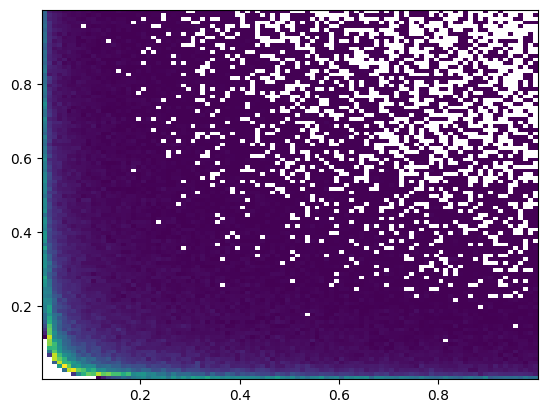

In [5]:
plt.hist2d(x1.numpy(), x2.numpy(), bins=100, cmin=1);

In [6]:
ps_back = phasespace.get_ps_from_momenta(momenta[:,2:], x1, x2)

torch.Size([100000, 5])
torch.Size([100000, 2])


In [7]:
ps_back

tensor([[0.6809, 0.7887, 0.9267,  ..., 0.2975, 0.1905, 0.6866],
        [0.3170, 0.3194, 0.5902,  ..., 0.7570, 0.2988, 0.8811],
        [0.6979, 0.3200, 0.4850,  ..., 0.6840, 0.8256, 0.0391],
        ...,
        [0.8801, 0.0485, 0.4644,  ..., 0.7060, 0.7595, 0.0522],
        [0.1885, 0.3218, 0.8228,  ..., 0.1699, 0.2088, 0.5386],
        [0.7966, 0.1670, 0.2452,  ..., 0.0579, 0.4898, 0.2492]])

(array([2.61376e+05, 5.41890e+04, 1.11200e+03, 7.90000e+01, 8.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]),
 array([-17. , -15.1, -13.2, -11.3,  -9.4,  -7.5,  -5.6,  -3.7,  -1.8,
          0.1,   2. ]),
 <BarContainer object of 10 artists>)

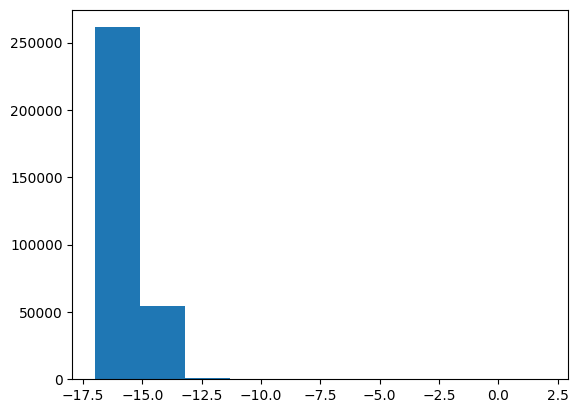

In [13]:
plt.hist(torch.log10(torch.abs(1- ps_back/points_out)).flatten(), bins=10, range=(-17, 2))

In [17]:
momenta_back, weights, x1_back, x2_back = phasespace.get_momenta_from_ps(points_out)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([-20. , -19.1, -18.2, -17.3, -16.4, -15.5, -14.6, -13.7, -12.8,
        -11.9, -11. , -10.1,  -9.2,  -8.3,  -7.4,  -6.5,  -5.6,  -4.7,
         -3.8,  -2.9,  -2. ]),
 <BarContainer object of 20 artists>)

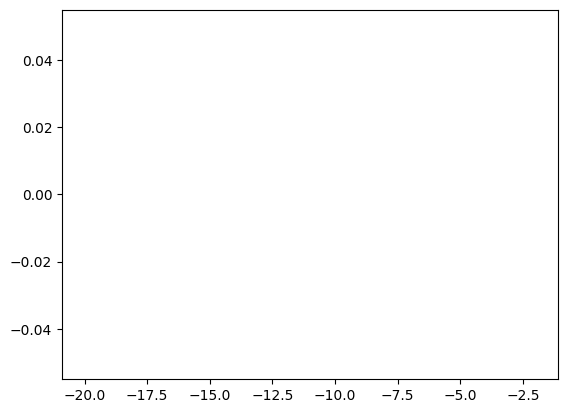

In [18]:
plt.hist(torch.log10(torch.abs(1- momenta_back/momenta)).flatten(), bins=20, range=(-20, -2))

In [23]:
x2 == x2_back

tensor([True, True, True,  ..., True, True, True])